<a href="https://colab.research.google.com/github/pfolaa/fraud_detection/blob/main/Fraud_detecttion_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob
import glob2
import tqdm
import json
import pandas as pd
import sys

In [3]:
cd /content/drive/MyDrive/datasets/

/content/drive/MyDrive/datasets


In [4]:
sys.path.insert(0, '/content/drive/MyDrive/datasets/')

In [5]:
from utils import convertToTimestamp
from utils import read_json_insert_csv
from utils import process_json
from utils import getListFileCSV
from utils import parse_wallet_sms_payload_success
from utils import parse_providus_transfer_error_function
from utils import parse_and_concatenate_Leadway_Success_Rows
from utils import parse_Leadway_Success_Row
from utils import parse_Error_Row
from utils import parse_Error_Row_selfie_Function
from utils import parse_Error_Row_selfie_INSERT_INTO_Function
from utils import parse_Error_Row_Function
from utils import df_number_of_operations_per_minute
from utils import list_all_df_with_conversion_in_datetime
from preproc import parse_ERROR_DF
from preproc import parse_row_LOAN_PAYLOAD
from preproc import parse_API_REQUEST_DF
from preproc import parse_CLIENT_MOBILE_LOGIN_DF
from preproc import parse_SMS_PAYLOAD_DF
from preproc import parse_SMS_SUCCESS_DF
from preproc import parse_WALLET_SUCCESS_DF
from preproc import parse_OKRA_WEBHOOK_DF
from preproc import parse_LEADWAY_DF
from preproc import parse_PROVIDUS_PAYLOAD_DF
from preproc import parse_PROVIDUS_SUCCESS_DF
from preproc import parse_VTPASS_PAYLOAD_DF
from preproc import parse_LEADWAY_ERROR_DF
from preproc import parse_PROVIDUS_TRANSFER_ERROR_DF
from preproc import parse_PROVIDUS_TRANSFER_SUCCESS_DF
from preproc import parse_PROVIDUS_SETTLEMENT_INFO_DF
from preproc import parse_PROVIDUS_VERIFY_SETTLEMENT_INFO_DF
from preproc import subfilter_DF
from preproc import concatenate_info_DF
from preproc import get_unique_numbers_DF
from preproc import save_info_per_phone_number_DF


In [6]:
json_path = os.path.join('./nirra-log-bot','*.json')

In [7]:
json_files = glob2.glob(os.path.join('./nirra-log-bot','*.json'))

In [8]:
path_dest = os.path.join('./liberta_leasing')

In [9]:
process_json('./nirra-log-bot', './liberta_leasing')

100%|██████████| 170/170 [01:12<00:00,  2.34it/s]


In [10]:
cd /content/drive/MyDrive/datasets/liberta_leasing/

/content/drive/MyDrive/datasets/liberta_leasing


In [11]:
path_file_csv = os.getcwd()

In [12]:
all_df_list = getListFileCSV(path_file_csv)

100%|██████████| 170/170 [00:01<00:00, 133.19it/s]


### Concatener la liste des DataFrames pour avoir un dataframe entier

In [13]:
df_raw = pd.concat(all_df_list, ignore_index=True)

### Sauvegarder le dataframe en local

In [14]:
df_raw.to_csv('/content/drive/MyDrive/datasets/nirra_log_bot.csv', index=None, sep='|')

### Dataframe LOAN ERROR

In [ ]:
df_raw['text'].fillna('', inplace=True)
error = df_raw[df_raw['text'].str.contains('LOAN ERROR')]
df_error = parse_ERROR_DF(error)

### Dataframe LOAN PAYLOAD

In [ ]:
df_raw['text'].fillna('', inplace=True)
loan_payload = df_raw[df_raw['text'].str.contains('LOAN PAYLOAD')]
df_loan_payload = parse_row_LOAN_PAYLOAD(loan_payload)

### Dataframe API REQUEST

In [ ]:
df_raw['text'].fillna('', inplace=True)
api_request = df_raw[df_raw['text'].str.contains('API REQUEST')]
df_api_request = parse_API_REQUEST_DF(api_request)

### Dataframe CLIENT LOGIN MOBILE

In [ ]:
df_raw['text'].fillna('', inplace=True)
client_mobile_login = df_raw[df_raw['text'].str.contains('CLIENT MOBILE LOGIN')]
df_client_mobile_login = parse_CLIENT_MOBILE_LOGIN_DF(client_mobile_login)

### Dataframe SMS PAYLOAD

In [ ]:
df_raw['text'].fillna('', inplace=True)
sms_payload = df_raw[df_raw['text'].str.contains('SMS PAYLOAD')]
df_sms_payload = parse_SMS_PAYLOAD_DF(sms_payload)

### Dataframe SMS SUCCESS

In [ ]:
df_raw['text'].fillna('', inplace=True)
sms_success = df_raw[df_raw['text'].str.contains('SMS SUCCESS')]
df_sms_success = parse_SMS_SUCCESS_DF(sms_success)

### Dataframe WALLET SUCCESS

In [ ]:
df_raw['text'].fillna('', inplace=True)
wallet_success = df_raw[df_raw['text'].str.contains('WALLET SUCCESS')]
df_wallet_success = parse_WALLET_SUCCESS_DF(wallet_success)

Dataframe OKRA WEBHOOK

In [ ]:
df_raw['text'].fillna('', inplace=True)
df_okra_webhook = parse_OKRA_WEBHOOK_DF(df_raw[df_raw['text'].str.contains('OKRA WEBHOOK')])

### Dataframe PROVIDUS PAYLOAD

In [ ]:
df_raw['text'].fillna('', inplace=True)
providus_payload_df = df_raw[df_raw['text'].str.contains('PROVIDUS PAYLOAD')]
df_providus_payload = parse_PROVIDUS_PAYLOAD_DF(providus_payload_df)

### Dataframe PROVIDUS SUCCESS

In [ ]:
providus_success_df = df_raw[df_raw['text'].str.contains('PROVIDUS SUCCESS')]
df_providus_success = parse_PROVIDUS_SUCCESS_DF(providus_success_df)

### Dataframe VTPASS PAYLOAD

In [ ]:
vtpass_payload = df_raw[df_raw['text'].str.contains('VTPASS PAYLOAD')]
df_vtpass_payload = parse_VTPASS_PAYLOAD_DF(vtpass_payload)

### Dataframe LEADWAY ERROR

In [ ]:
lead_error = df_raw[df_raw['text'].str.contains('LEADWAY ERROR')]
df_lead_error = parse_LEADWAY_ERROR_DF(lead_error)

### Dataframe PROVIDUS TRANSFER ERROR

In [ ]:
providus_transfer_error = df_raw[df_raw['text'].str.contains('PROVIDUS TRANSFER ERROR')]
df_providus_transfer_error = parse_PROVIDUS_TRANSFER_ERROR_DF(providus_transfer_error)

### Dataframe PROVIDUS TRANSFER SUCCESS

In [ ]:
providus_transfer_success = df_raw[df_raw['text'].str.contains('PROVIDUS TRANSFER SUCCESS')]
df_providus_transfer_success = parse_PROVIDUS_TRANSFER_SUCCESS_DF(providus_transfer_success)

### Dataframe PROVIDUS SETTLEMENT INFO

In [ ]:
providus_settlement_info = df_raw[df_raw['text'].str.contains('PROVIDUS SETTLEMENT INFO')]
df_providus_settlement_info = parse_PROVIDUS_SETTLEMENT_INFO_DF(providus_settlement_info)

### Dataframe PROVIDUS VERIFY SETTLEMENT INFO

In [ ]:
providus_verify_settlement_info = df_raw[df_raw['text'].str.contains('PROVIDUS VERIFY SETTLEMENT INFO')]
df_providus_verify_settlement_info = parse_PROVIDUS_VERIFY_SETTLEMENT_INFO_DF(providus_verify_settlement_info)

### Concatenation de tous les DF

In [33]:
pdList = [df_api_request, df_client_mobile_login, df_loan_payload, df_lead_error, df_okra_webhook, df_providus_payload, df_providus_settlement_info,
          df_providus_success, df_providus_transfer_error, df_providus_transfer_success, df_providus_verify_settlement_info,
          df_sms_payload, df_sms_success, df_vtpass_payload, df_wallet_success]  # List of our dataframes
df_final = pd.concat(pdList, axis=0)

In [ ]:
df_final.sort_values('Date')

In [36]:
df_with_loan_amount = df_final[df_final['text'].str.contains('loan_amount')].copy()

In [37]:
df_with_total_sent = df_final[df_final['text'].str.contains('totalsent')].copy()

In [ ]:
df_final.info(verbose=True, null_counts=True)

In [43]:
list_index_loan_amount = list(df_with_loan_amount.index)

In [40]:
list_index_total_sent = list(df_with_total_sent.index)

In [41]:
import datetime

def difference_ts(date_in_timestamp):
  dt = datetime.datetime.fromtimestamp(date_in_timestamp)
  res = dt - datetime.timedelta(minutes=30) 
  return datetime.datetime.timestamp(res)

In [ ]:
import numpy as np

for index in tqdm.tqdm(list_index_loan_amount):
  df_res = df_final[(df_final['ts'] <= df_final.loc[index, 'ts']) & (df_final['ts'] > difference_ts(df_final.loc[index, 'ts']))]
  list_index = df_res[df_res['Phone_Number'].isnull() == False].index.values
  if len(list_index) > 0:
    min_index = np.min(list_index)
    df_final['Phone_Number'][index] = df_res.loc[min_index, 'Phone_Number']

In [47]:
cd /content/drive/My Drive/datasets/final

/content/drive/My Drive/datasets/final


### Export DF

In [48]:
df_final.to_csv('/content/drive/MyDrive/datasets/final/nirra_log_bot_final.csv', index=None)

In [53]:
all_users_phone_number = get_unique_numbers_DF(df_final)

In [58]:
all_df_phone_number = [] # to get list of dataframes
for phoneNumber in tqdm.tqdm(all_users_phone_number):
  df_phone_number = df_final[df_final['Phone_Number'] == phoneNumber] # récupérer les dataframes avec seulement les numéros de téléphone
  all_df_phone_number.append(df_phone_number)  # mettre chaque dataframe dans la

100%|██████████| 6054/6054 [00:38<00:00, 157.04it/s]


### Sauvegarder sur le disque les dataframes de chaque utilisateur

In [59]:
from tqdm import tqdm
# tqdm permet
for phoneNumber in tqdm(all_users_phone_number):
  df_phone_number = df_final[df_final['Phone_Number'] == phoneNumber]
  df_phone_number.to_csv(f'/content/drive/MyDrive/datasets/final/files/{phoneNumber}.csv', index=None)

100%|██████████| 6054/6054 [22:02<00:00,  4.58it/s]


### se déplacer dans le dossier contenant les dataframes de chaque utilisateur

In [60]:
cd /content/drive/MyDrive/datasets/final/files/

/content/drive/MyDrive/datasets/final/files


### avoir le nombre de transactions de chaque utilisateur

In [61]:
import pandas as pd
import os
import glob
from tqdm import tqdm
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np


# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
all_df_list = [] # list of all dataframe
# loop over the list of csv files
number_transactions = []
all_df_list_with_number_transaction = []


for f in tqdm(csv_files):    
    # read the csv file
    df = pd.read_csv(f)  
    all_df_list.append(df)   

for element in all_df_list:
  element['Number_Transactions'] = element.shape[0] # faire la somme des lignes et mettre dans la colonne Number_Transactions
  all_df_list_with_number_transaction.append(element)# mettre tous les éléments dans une nouvelle liste


100%|██████████| 6054/6054 [01:19<00:00, 76.58it/s]


In [62]:
#Faire la différence entre les timestamp et la mettre dans la colonne 'ts_diff'
list_df_with_diff_ts = []
for ele_with_num_trans in tqdm(all_df_list_with_number_transaction):
  df_ts = pd.DataFrame(ele_with_num_trans['ts'])
  df_ts.sort_values('ts')
  ele_with_num_trans['ts_diff'] = df_ts.diff(axis=0)
  list_df_with_diff_ts.append(ele_with_num_trans)

100%|██████████| 6054/6054 [00:08<00:00, 674.57it/s]


In [106]:
path = os.getcwd()

In [64]:
all_df_with_conversion_in_datetime = list_all_df_with_conversion_in_datetime(path)

100%|██████████| 6054/6054 [01:39<00:00, 61.04it/s]


In [65]:
from tqdm import tqdm
# on sauvegarde les fichiers en fonction du phone_number et du type_request parce qu'un meme utilisateur
# peut effectuer plusieurs opérations de différents type request, en faisant ainsi, il n'y'a pas de risque d'écraser
# certains fichiers du meme utilisateur.
for ele in tqdm(all_df_with_conversion_in_datetime):
  if ele.shape[0] > 0:
    phone_number = ele['Phone_Number'][0]
    type_request = ele['Type_Request'][0]
    t_r = type_request.replace(' ', '_')
    ele.to_csv(f'/content/drive/MyDrive/datasets/final/new_files/{phone_number}_{t_r}.csv', index=None)

100%|██████████| 6054/6054 [01:13<00:00, 82.83it/s]


### Fonction pour calculer le nombre d'opérations par minute

In [67]:
list_all_df_with_operations_per_minute = []
for element in tqdm(all_df_list_new):
  # pour debugger il faut utiliser try -  except et utiliser pass
  # ainsi, en cas de problème on pourrait savoir dans quel DataFrame il se trouve
  if element.shape[0] > 1:
    element.sort_values('TS_to_DateTime')
    list_all_df_with_operations_per_minute.append(df_number_of_operations_per_minute(element))

100%|██████████| 6054/6054 [04:00<00:00, 25.16it/s]


In [ ]:
list_all_df_with_operations_per_minute[0:50]

In [ ]:
[element for element in list_all_df_with_operations_per_minute if element['Phone_Number'][0] == 8066738373]

### Diviser la liste des dataframes avec operations par minute en DF de Train et de Test

In [70]:
# concatenation de la liste des dataframes
df_with_operations_per_minute = pd.concat(list_all_df_with_operations_per_minute, axis=0).reset_index(drop=True)

In [ ]:
df_with_operations_per_minute

In [72]:
from sklearn.model_selection import train_test_split
#Split dataset into train and test
X_train_with_operations_per_minute, X_test_with_operations_per_minute = train_test_split(df_with_operations_per_minute, test_size = 0.3)

### DataSet de Train

In [ ]:
X_train_with_operations_per_minute

In [74]:
df_phone_number_with_operations_per_minute = X_train_with_operations_per_minute[['Phone_Number', 'Type_Request']]

In [ ]:
# on récupère tous les index du Dataframe de test
X_train_with_operations_per_minute.index

In [76]:
# on drop les colonnes Phone_Number et Type_Request
X_train_with_operations_per_minute.drop(['Phone_Number', 'Type_Request'],  axis=1, inplace=True)

In [77]:
# convertir le dataframe de X_train en une liste
list_with_operations_per_minute = X_train_with_operations_per_minute.values.tolist()

### on applique le StandardScaler

In [78]:
from sklearn.preprocessing import StandardScaler 
#Scaled_data = StandardScaler().fit_transform(list_resultats)
Scaled_data_with_operations_per_minute = StandardScaler().fit_transform(list_with_operations_per_minute)

### Application de l'algorithme IsolationForest

In [79]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.005)
model.fit(list_with_operations_per_minute)

# dans le résultat, on aura des 1 et des -1
# les 1 représentent les données qui ne sont pas des anomalies
# les -1 sont des données qui représentent des anomalies
isol_pred_with_operations_per_minute = model.predict(list_with_operations_per_minute)

In [80]:
df_iso_with_operations_per_minute = pd.DataFrame(isol_pred_with_operations_per_minute, columns=['Isolation_with_operations_per_minute'])

In [81]:
list_utilisateurs_outliers_IsolationForest = df_iso_with_operations_per_minute[df_iso_with_operations_per_minute['Isolation_with_operations_per_minute'] == -1].index

In [ ]:
list_utilisateurs_outliers_IsolationForest

In [ ]:
X_train_with_operations_per_minute.iloc[list_utilisateurs_outliers_IsolationForest]

In [ ]:
df_phone_number_with_operations_per_minute.iloc[list_utilisateurs_outliers_IsolationForest]

In [85]:
# concatener les deux dataframes
pdList_operations_per_minute = [df_phone_number_with_operations_per_minute.iloc[list_utilisateurs_outliers_IsolationForest], 
                                 X_train_with_operations_per_minute.iloc[list_utilisateurs_outliers_IsolationForest]] # List of our dataframes
df_final_operations_per_minute = pd.concat(pdList_operations_per_minute, axis=1)

In [ ]:
df_final_operations_per_minute

In [ ]:
df_iso_with_operations_per_minute

In [ ]:
df_iso_with_operations_per_minute.value_counts()

In [89]:
# construisons le dictionnaire pour Isolation Forest qu'on va passer dans Standard Scaler
my_dict_isolation_with_operations_per_minute = {-1:"red", 1:"blue"}
my_colors_isolation_with_operations_per_minute = [my_dict_isolation_with_operations_per_minute[el_1] for el_1 in isol_pred_with_operations_per_minute]

### Dataset de Test

In [ ]:
X_test_with_operations_per_minute

In [91]:
df_test_phone_number_with_operations_per_minute = X_test_with_operations_per_minute[['Phone_Number', 'Type_Request']]

In [ ]:
X_test_with_operations_per_minute.index

In [93]:
X_test_with_operations_per_minute.drop(['Phone_Number', 'Type_Request'],  axis=1, inplace=True)

In [94]:
# convertir le dataframe de X_train en une liste
list_test_with_operations_per_minute = X_test_with_operations_per_minute.values.tolist()

In [95]:
from sklearn.preprocessing import StandardScaler 
#Scaled_data = StandardScaler().fit_transform(list_resultats)
Scaled_test_data_with_operations_per_minute = StandardScaler().fit_transform(list_test_with_operations_per_minute)

### Isolation Forest pour dataset de test

In [96]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.005)
model.fit(list_test_with_operations_per_minute)

# dans le résultat, on aura des 1 et des -1
# les 1 représentent les données qui ne sont pas des anomalies
# les -1 sont des données qui représentent des anomalies
isol_test_pred_with_operations_per_minute = model.predict(list_test_with_operations_per_minute)

In [97]:
df_test_iso_with_operations_per_minute = pd.DataFrame(isol_test_pred_with_operations_per_minute, columns=['Isolation_test_with_operations_per_minute'])

In [98]:
list_test_utilisateurs_outliers_IsolationForest = df_test_iso_with_operations_per_minute[df_test_iso_with_operations_per_minute['Isolation_test_with_operations_per_minute'] == -1].index

In [99]:
list_test_utilisateurs_outliers_IsolationForest

Int64Index([64, 72, 445, 556], dtype='int64')

In [ ]:
X_test_with_operations_per_minute.iloc[list_test_utilisateurs_outliers_IsolationForest]

In [ ]:
df_test_phone_number_with_operations_per_minute.iloc[list_test_utilisateurs_outliers_IsolationForest]

In [102]:
# concatener les deux dataframes
pdList_test_operations_per_minute = [df_test_phone_number_with_operations_per_minute.iloc[list_test_utilisateurs_outliers_IsolationForest], 
                                 X_test_with_operations_per_minute.iloc[list_test_utilisateurs_outliers_IsolationForest]] # List of our dataframes
df_final_test_operations_per_minute = pd.concat(pdList_test_operations_per_minute, axis=1)

In [103]:
df_test_iso_with_operations_per_minute.value_counts()

Isolation_test_with_operations_per_minute
 1                                           787
-1                                             4
dtype: int64

In [104]:
# construisons le dictionnaire pour Isolation Forest qu'on va passer dans Standard Scaler
my_dict_test_isolation_with_operations_per_minute = {-1:"black", 1:"green"}
my_colors_test_isolation_with_operations_per_minute = [my_dict_test_isolation_with_operations_per_minute[el_1] for el_1 in isol_test_pred_with_operations_per_minute]

### PCA pour les Dataframe de Train et de Test

            pc1       pc2
147    7.912068  3.154426
1136  13.432055  5.184494
1668  10.981713  4.785758


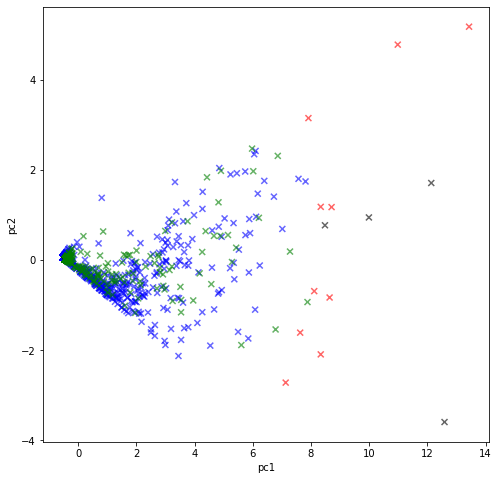

In [105]:
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import random

# Scale data before applying PCA
#scaling=StandardScaler()
 
# Use fit and transform method
#scaling.fit(df1)
#Scaled_data=scaling.transform(df1)
 
# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data_with_operations_per_minute)
# x pour le dataframe de Train
x = principal.transform(Scaled_data_with_operations_per_minute)
# x_prime pour le dataframe de Test
x_prime = principal.transform(Scaled_test_data_with_operations_per_minute)
 
# Check the dimensions of data after PCA
#print(x.shape)

principal.components_

#df_sortie pour le dataframe de train
df_sortie = pd.DataFrame(x, columns=['pc1', 'pc2'])
# df_sortie_prime pour le dataframe de test
df_sortie_prime = pd.DataFrame(x_prime, columns=['pc1', 'pc2'])
#print(df_sortie)
df_filtre = df_sortie[(df_sortie['pc1'] >= 5) & (df_sortie['pc2'] >= 3)]
print(df_filtre)

# attribut (x) et labels (y) pour le dataframe de train à deux dimensions
x=df_sortie['pc1']
y=df_sortie['pc2']
#z=df_sortie['pc3']
# attribut (x_prime) et labels (y_prime) pour le dataframe de train à deux dimensions
x_prime=df_sortie_prime['pc1']
y_prime=df_sortie_prime['pc2']
 
# Creating figure
#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")

 
# Creating plot
#ax.scatter3D(x, y, z, color = my_colors_isolation_with_operations_per_minute)
#plt.title("simple 3D scatter plot")

plt.figure(figsize=(8,8))
#plt.scatter(x[:,0]+random.uniform(0, 1)/10, x[:,1]+random.uniform(0, 1)/100, c=my_colors_isolation_with_operations_per_minute, cmap='plasma', marker='x', alpha=0.4)
# scatter pour le dataframe de train
plt.scatter(x, y, color=my_colors_isolation_with_operations_per_minute, cmap='plasma', marker='x', alpha=0.6)
# scatter pour le dataframe de test
plt.scatter(x_prime, y_prime, color=my_colors_test_isolation_with_operations_per_minute, cmap='plasma', marker='x', alpha=0.6)
plt.xlabel('pc1')
plt.ylabel('pc2')


# show plot
plt.show()